In [1]:
# Import ESP32 CSI Parser to read CSI data collected using 'ESP32 CSI toolkit'
!pip install csiparser
import csiparser

# Import Matplotlib to plot amplitude and phase from CSI data
%matplotlib inline
import matplotlib.pyplot as plt

# Import Numpy for scalling plot axis
import numpy as np

In [2]:
example_csi = (
    csiparser.ESP32("./example_csi.csv")
             .filter_by_sig_mode(1)
             .get_csi()
            #  .remove_null_subcarriers()
             .get_amplitude_from_csi()
             .get_phase_from_csi()
)

# Retrive amplitude and phase
amplitude = example_csi.amplitude
phase = example_csi.phase

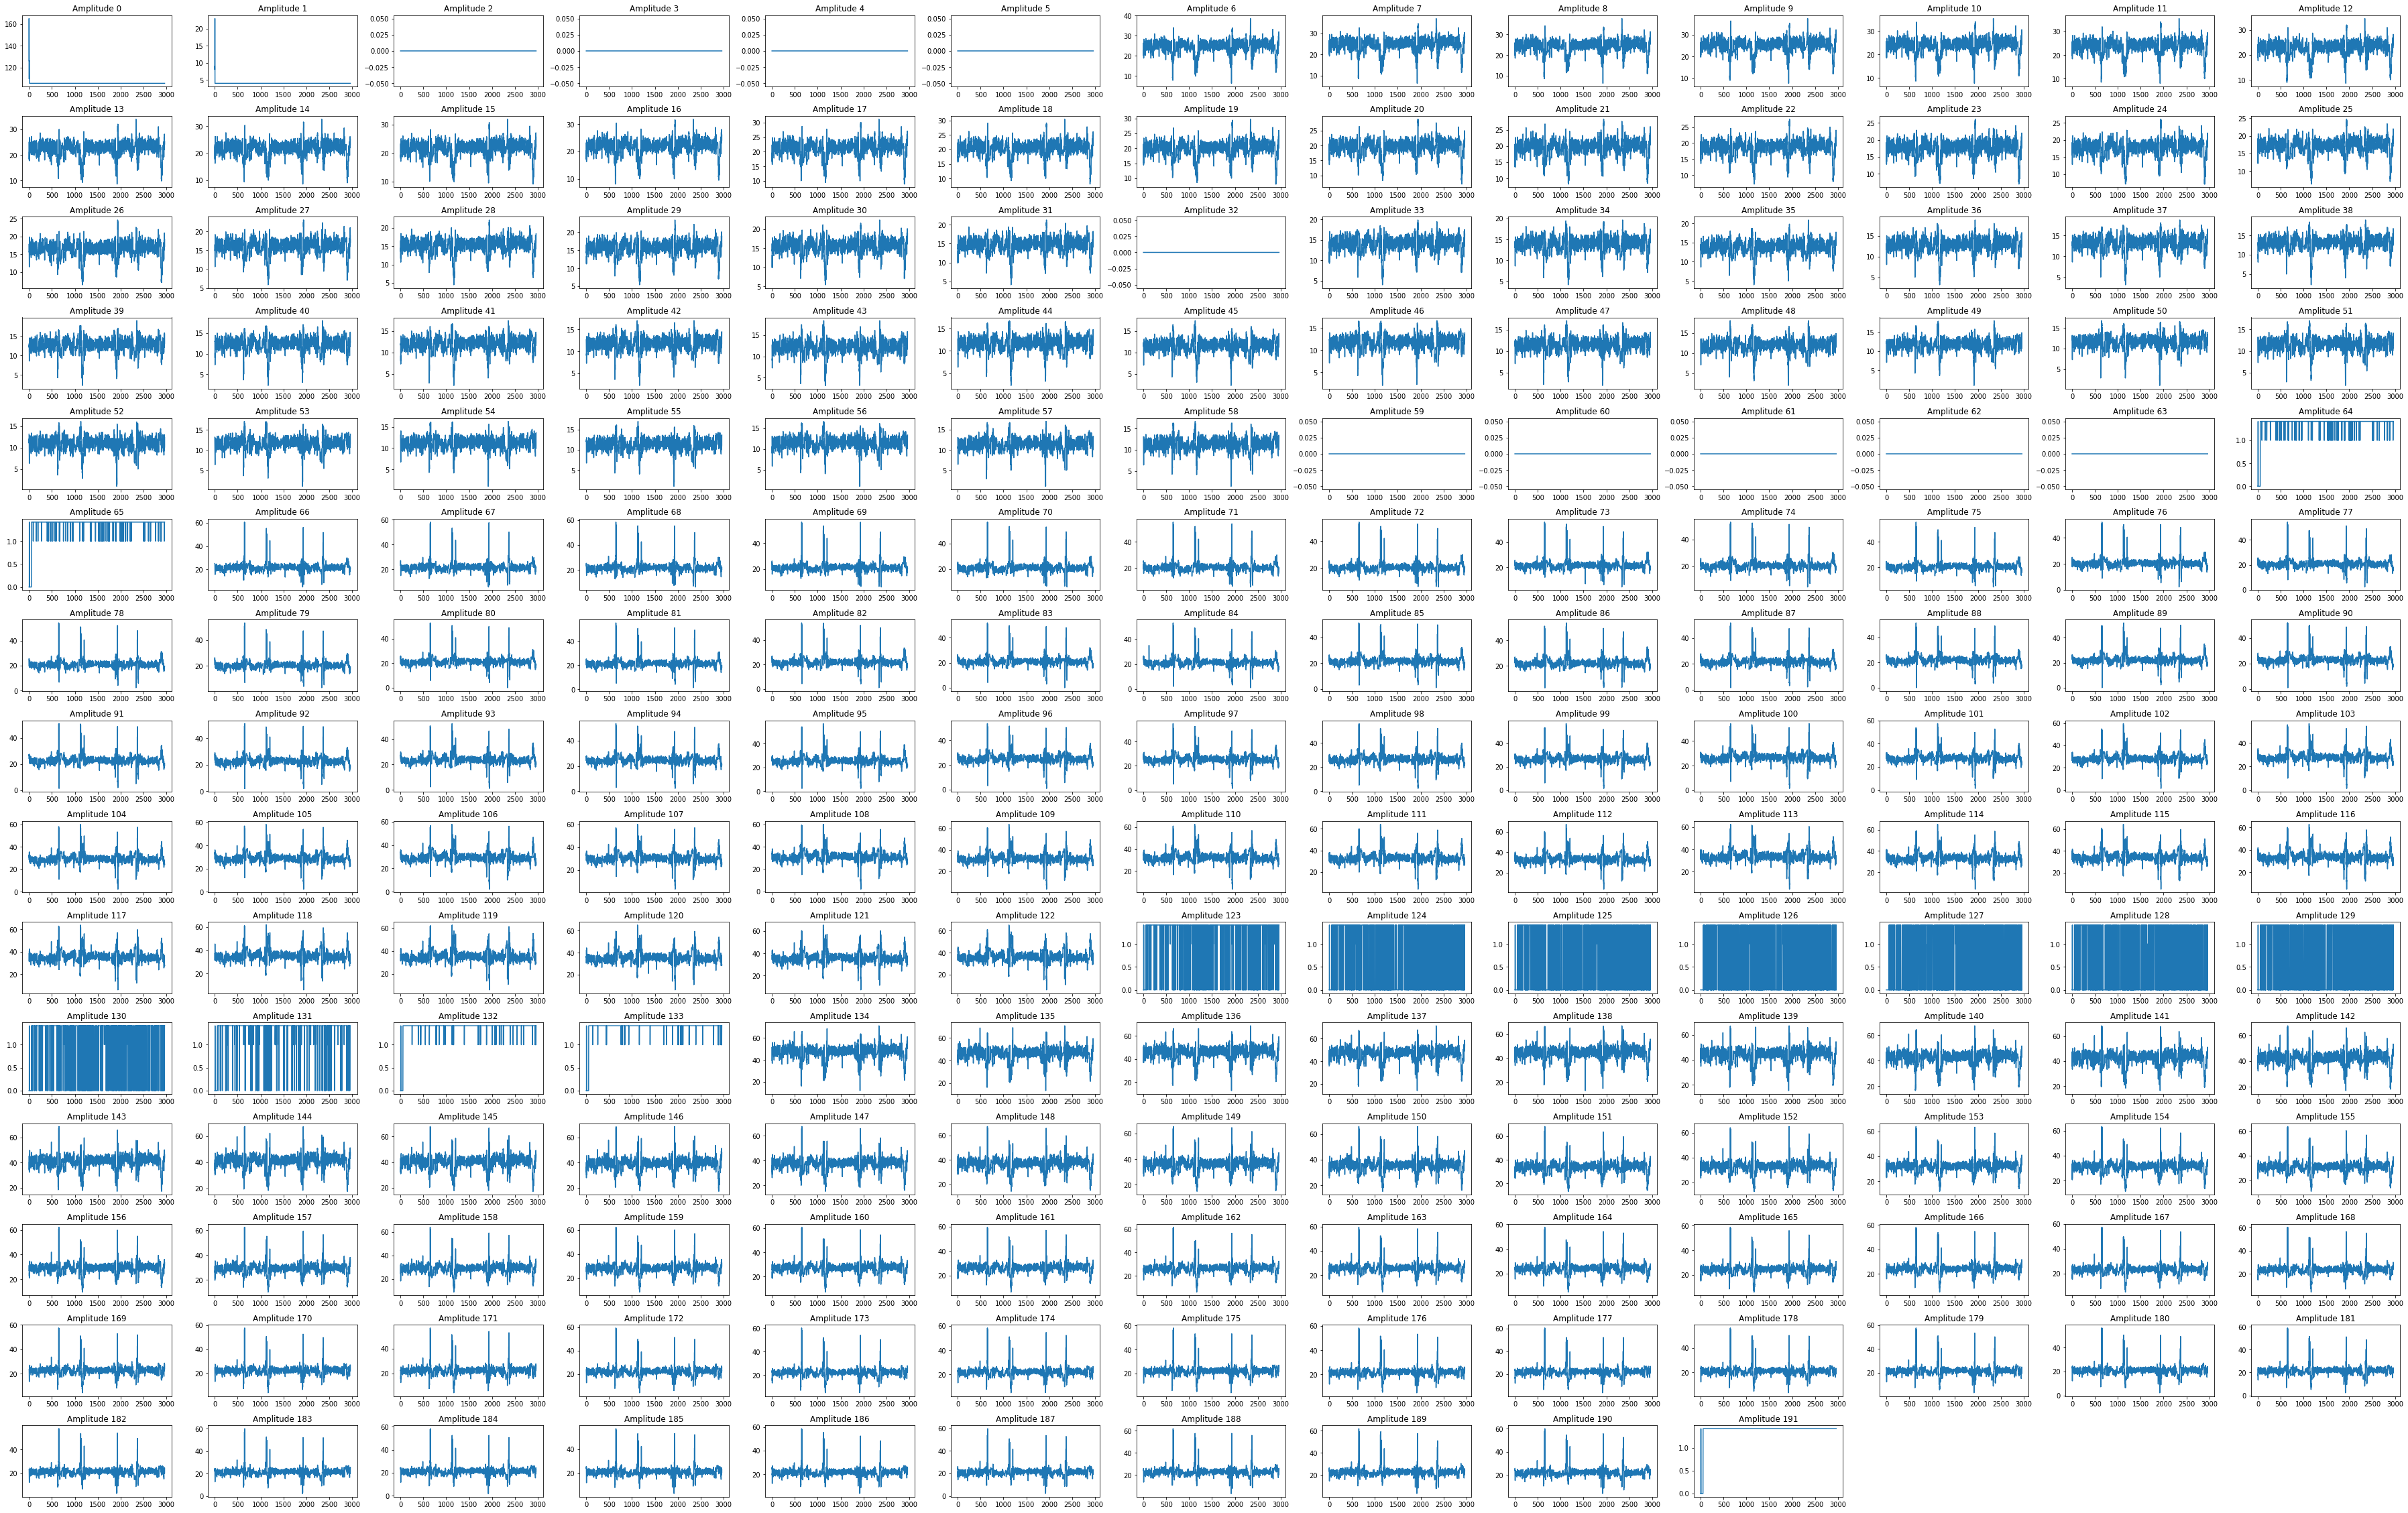

In [3]:
# Ref: https://stackoverflow.com/questions/12319796/dynamically-add-create-subplots-in-matplotlib

Tot = amplitude.shape[1] #192 (Including Guard, NULL and Data Subcarriers)
Cols = int(Tot**0.5)

# Compute Rows required

Rows = Tot // Cols 
Rows += Tot % Cols

# Create a Position index

Position = range(1,Tot + 1)

# Create main figure

x = [i for i in range(amplitude.shape[1])]

fig = plt.figure(1)
fig.patch.set_facecolor('xkcd:white')
fig.set_figheight(50)
fig.set_figwidth(50)
for k in range(Tot):

  # add every single subplot to the figure with a for loop

  ax = fig.add_subplot(Rows,Cols,Position[k])
  ax.title.set_text('Amplitude {}'.format(k))
  ax.plot(amplitude.T[k])

plt.tight_layout() 
plt.show()